### 데이터 불러오기

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [8]:
transform_train = transforms.Compose([transforms.RandomHorizontalFlip(),
                                transforms.ToTensor(), 
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

transform_test = transforms.Compose([transforms.ToTensor(),
                                    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


### 데이터 일부 확인

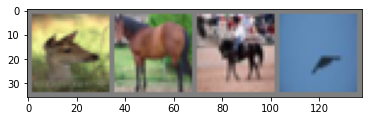

deer  horse horse plane


In [9]:
import matplotlib.pyplot as plt
import numpy as np

# 이미지를 보여주기 위한 함수

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# 학습용 이미지를 무작위로 가져오기
dataiter = iter(trainloader)
images, labels = dataiter.next()

# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))
# 정답(label) 출력
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

## 모델 정의
이후부터 과제 진행하시면 됩니다! 위는 수정 XX

'#####으로 표시된 부분에 작성하세요!

In [25]:
import torch.nn as nn
import torch.nn.init as init

In [107]:
# conv. layer, relu,  pooling layer, fc layer를 모두 1층 이상 사용하는 모델 Net()을 만들어주세요

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        ##### 아래 작성 #####
        self.layer = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=40, kernel_size=5, padding=2), # 32*32 -> 32*32
            nn.BatchNorm2d(40),
            nn.ReLU(),
            nn.Conv2d(in_channels=40, out_channels=50, kernel_size=7, padding=3), # 32*32 -> 32*32
            nn.BatchNorm2d(50),
            nn.ReLU(),
            nn.Dropout2d(0.2),
            nn.MaxPool2d(kernel_size=2, stride=2),                     # 32*32 -> 16*16
            nn.Conv2d(in_channels=50, out_channels=65, kernel_size=3), # 16*16 -> 14*14
            nn.BatchNorm2d(65),
            nn.ReLU(),
            nn.Conv2d(in_channels=65, out_channels=70, kernel_size=5), # 14*14 -> 10*10
            nn.BatchNorm2d(70),
            nn.ReLU())
        
        self.fc_layer = nn.Sequential(
            nn.Linear(70*10*10, 250),
            nn.BatchNorm1d(250),
            nn.ReLU(),
            nn.Linear(250, 10))
              #Initialization. 
        # 초기화 하는 방법
        # 모델의 모듈을 차례대로 불러옵니다.
        for m in self.modules():
            # 만약 그 모듈이 nn.Conv2d인 경우
            if isinstance(m, nn.Conv2d):
                '''
                # 작은 숫자로 초기화하는 방법
                # 가중치를 평균 0, 편차 0.02로 초기화합니다.
                # 편차를 0으로 초기화합니다.
                m.weight.data.normal_(0.0, 0.02)
                m.bias.data.fill_(0)
                
                # Xavier Initialization
                # 모듈의 가중치를 xavier normal로 초기화합니다.
                # 편차를 0으로 초기화합니다.
                init.xavier_normal(m.weight.data)
                m.bias.data.fill_(0)
                '''
                
                # Kaming Initialization
                # 모듈의 가중치를 kaming he normal로 초기화합니다.
                # 편차를 0으로 초기화합니다.
                init.kaiming_normal_(m.weight.data)
                m.bias.data.fill_(0)
            
            # 만약 그 모듈이 nn.Linear인 경우
            elif isinstance(m, nn.Linear):
                '''
                # 작은 숫자로 초기화하는 방법
                # 가중치를 평균 0, 편차 0.02로 초기화합니다.
                # 편차를 0으로 초기화합니다.
                m.weight.data.normal_(0.0, 0.02)
                m.bias.data.fill_(0)
                
                # Xavier Initialization
                # 모듈의 가중치를 xavier normal로 초기화합니다.
                # 편차를 0으로 초기화합니다.
                init.xavier_normal(m.weight.data)
                m.bias.data.fill_(0)
                '''
                
                # Kaming Initialization
                # 모듈의 가중치를 kaming he normal로 초기화합니다.
                # 편차를 0으로 초기화합니다.
                init.kaiming_normal_(m.weight.data)
                m.bias.data.fill_(0)

    def forward(self, x):
       ##### 아래 작성 #####
        out = self.layer(x)
        out = out.view(out.size(0), -1)
        out = self.fc_layer(out)
        return out


net = Net()

## 손실함수, optimizer 정의
필요한 모듈을 import하고 손실함수는 CrossEntropyLoss, optimizer는 SGD를 사용해주세요.

optimizer의 하이퍼파라미터는 lr=0.001, momentum=0.9로 통일합니다.

작성한 모델이 무거워 실행 시간이 오래 걸린다면 GPU를 활용하세요.

In [108]:
import torch.optim as optim

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

model = net.to(device)

loss_func = nn.CrossEntropyLoss()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.95)

## 모델 구조 확인
필요한 모듈을 import하여 모델의 구조를 확인하세요.

In [13]:
!pip install torchsummary

In [109]:
from torchsummary import summary
summary(model, (3, 32, 32), batch_size=200)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [200, 40, 32, 32]           3,040
       BatchNorm2d-2          [200, 40, 32, 32]              80
              ReLU-3          [200, 40, 32, 32]               0
            Conv2d-4          [200, 50, 32, 32]          98,050
       BatchNorm2d-5          [200, 50, 32, 32]             100
              ReLU-6          [200, 50, 32, 32]               0
         Dropout2d-7          [200, 50, 32, 32]               0
         MaxPool2d-8          [200, 50, 16, 16]               0
            Conv2d-9          [200, 65, 14, 14]          29,315
      BatchNorm2d-10          [200, 65, 14, 14]             130
             ReLU-11          [200, 65, 14, 14]               0
           Conv2d-12          [200, 70, 10, 10]         113,820
      BatchNorm2d-13          [200, 70, 10, 10]             140
             ReLU-14          [200, 70,

## Train

In [ ]:
# 모델을 학습

for epoch in range(3):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # [inputs, labels]의 목록인 data로부터 입력을 받은 후;
        inputs, labels = data
        x = inputs.to(device)
        y_ = labels.to(device)
        optimizer.zero_grad()
        output = model.forward(x)
        loss = loss_func(output, y_)
        loss.backward()
        optimizer.step()

        # 통계를 출력합니다.
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.082
[1,  4000] loss: 1.856
[1,  6000] loss: 1.782
[1,  8000] loss: 1.700
[1, 10000] loss: 1.583
[1, 12000] loss: 1.572


## Test

In [102]:
dataiter = iter(testloader)
images, labels = dataiter.next()

In [103]:
## 아래 코드 그대로 실행

correct = 0
total = 0
# 학습 중이 아니므로, 출력에 대한 변화도를 계산할 필요가 없습니다
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # 신경망에 이미지를 통과시켜 출력을 계산합니다
        outputs = net(images)
        # 가장 높은 값(energy)를 갖는 분류(class)를 정답으로 선택하겠습니다
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 57 %


## 클래스별 accuracy 비교

In [32]:
## 아래 코드 그대로 실행

# 각 분류(class)에 대한 예측값 계산을 위해 준비
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# 변화도는 여전히 필요하지 않습니다
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # 각 분류별로 올바른 예측 수를 모읍니다
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# 각 분류별 정확도(accuracy)를 출력합니다
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 51.7 %
Accuracy for class: car   is 69.9 %
Accuracy for class: bird  is 31.6 %
Accuracy for class: cat   is 20.2 %
Accuracy for class: deer  is 42.6 %
Accuracy for class: dog   is 50.4 %
Accuracy for class: frog  is 64.8 %
Accuracy for class: horse is 56.1 %
Accuracy for class: ship  is 64.9 %
Accuracy for class: truck is 61.1 %
